Źródło: https://www.datacamp.com/community/tutorials/social-network-analysis-python

Źródło danych: https://snap.stanford.edu/data/egonets-Facebook.html

# Analiza Sieci

Sieci są wszędzie.
Nie chodzi tutaj o sieci pajęcze czy sieć internetową, chociaż te także mają ciekawe struktury.
Mówimy tutaj o sieciach jako o relacji pomiędzy pewnymi obiektami, jak np. w sieciach społecznościowych.

W tym ćwiczeniu zajmiemy się analizą właśnie takiej sieci.
Wykorzystamy dane ze strony Uniwersytetu Stanford na temat powiązań pomiędzy znajomymi na Facebooku.

Do analizy sieci skorzystamy z modułu **networkx**:
``pip install networkx``

Na początek ładujemy graf relacji i wyświetlamy kilka informacji na jego temat.

In [9]:
import networkx as nx

graph_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

print(nx.info(graph_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


Teraz narysujemy ten graf, aby lepiej przyjrzeć się danym.
Skorzystamy z biblioteki **matplotlib**.

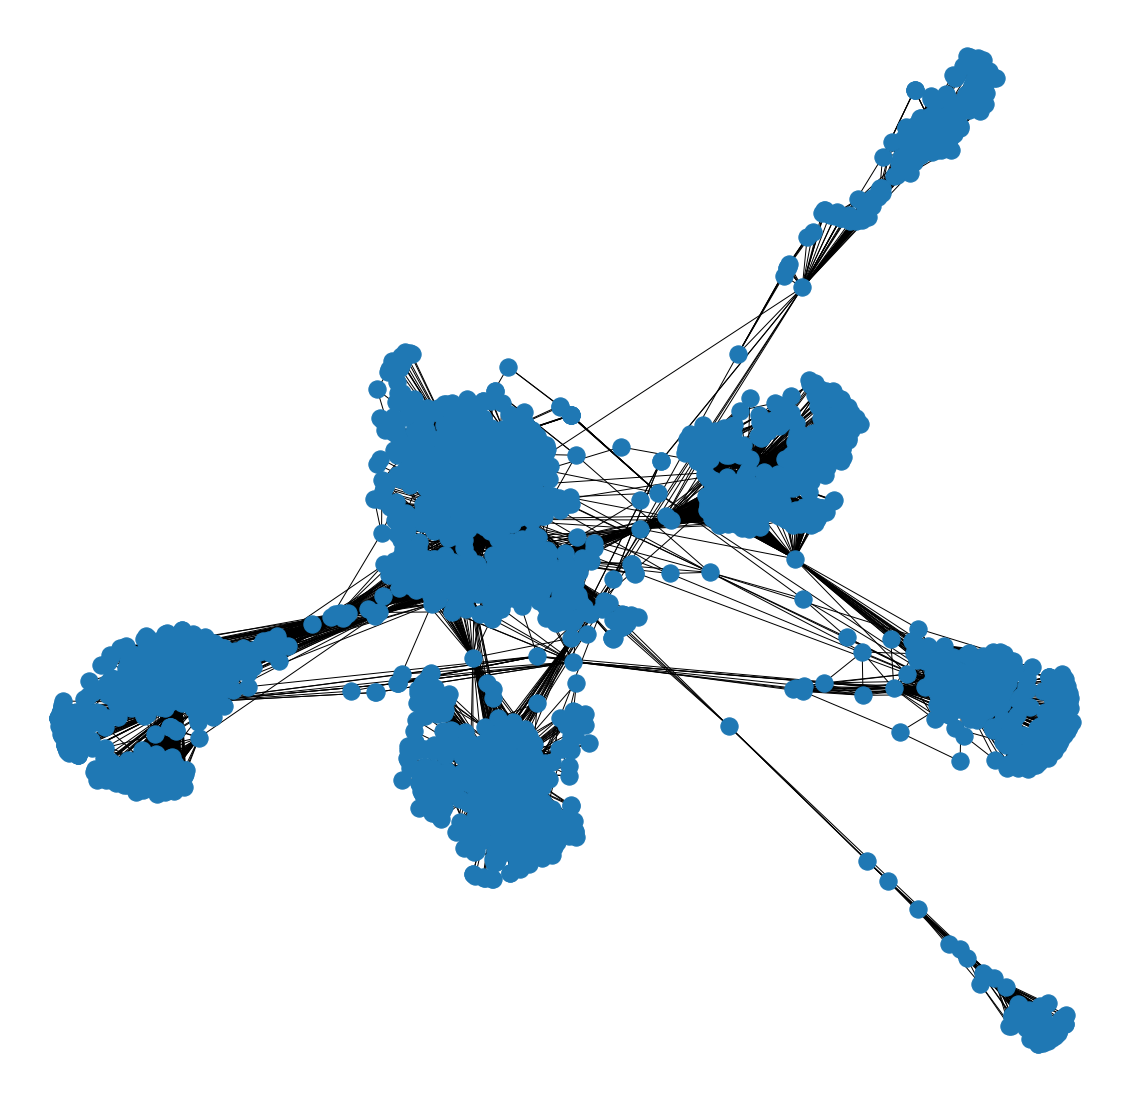

In [12]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(graph_fb)
plt.figure(figsize=(20,20))
nx.draw_networkx(graph_fb, pos=pos, with_labels=False,)
plt.axis('off')
plt.show()

Jak widać na grafie mamy duże zgrupowania danych.
Możemy poddać to dalszej analizie.
W tym celu przypiszemy do każdego wierzchołka kolor zależny od jego stopnia.
Zwiększymy także rozmiar niektórych wierzchołków zgodnie ze współczynnikiem *Betweenness Centrality*,
który jest miarą centralności grafu opartą na najkrótszych ścieżkach.

**Uwaga**: tworzenie grafu może chwilę potrwać.

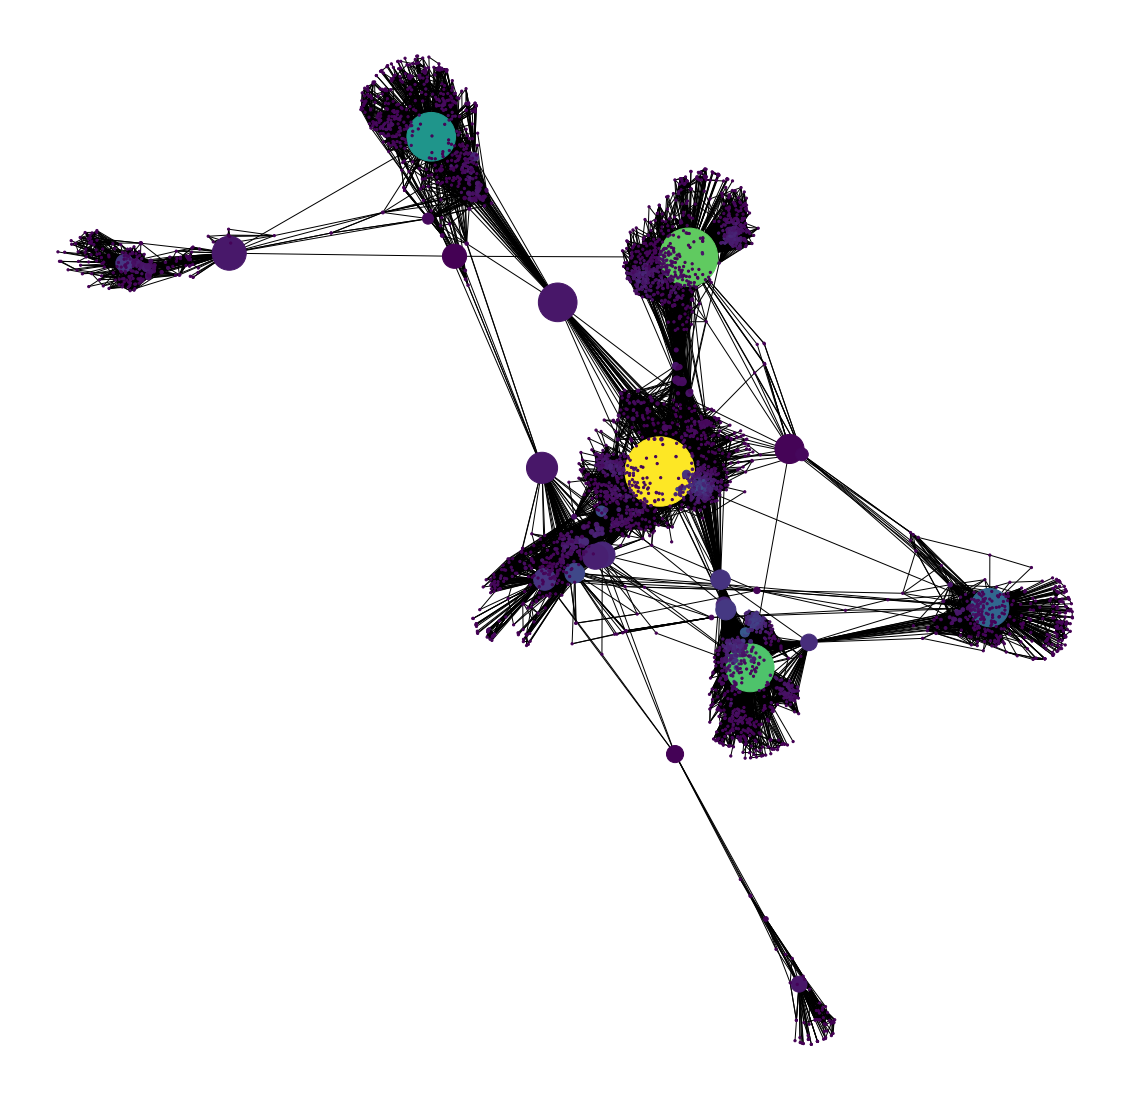

In [13]:
pos = nx.spring_layout(graph_fb)
betCent = nx.betweenness_centrality(graph_fb, normalized=True, endpoints=True)
node_color = [20000.0 * graph_fb.degree(v) for v in graph_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(graph_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

plt.show()
